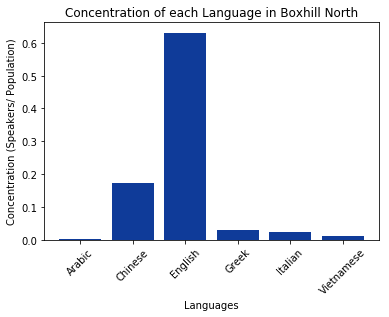

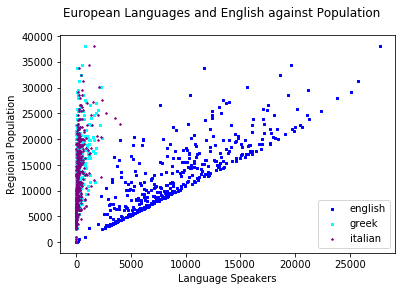

'NOTE\n   For some unknown reason, I cant seem to plot the two scatter plots together within the same cell or even the same notebook\n   I have commented out the asian languages one as you see, however, they work fine if you comment out the european one\n   Thank you'

In [175]:
#concentration coefficient of languages
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the csv files
cleanlang = pd.read_csv('cleanlang.csv')
cleanpop = pd.read_csv('cleanpop.csv')
#adding them into dataframes to use
langdf = pd.DataFrame(cleanlang)
popdf = pd.DataFrame(cleanpop)

#add region id into a series
region_id = pd.Series(langdf['region_id'])

#initialise a few lists for language/ population density
arabic = []
chinese = []
english = []
greek = []
italian = []
vietnamese =[]
#taking note of which regions are recorded without 0 population and population of each regin
region_name = []
region_pop = []

#loop through the two data frames by row
#since they are both sorted in order of names of regions, there is no need for a nest loop of O(n^2) runtime
for i in range(len(region_id)):
    #make sure theres no 0, so we don't end up dividing by zero
    if (popdf.ix[i, 'population_2011'])==0 :
        pass
    
    else:
        #noting the region names recorded
        region_name.append(popdf.ix[i, 'region_id'])
        
        #noting the region population
        region_pop.append(popdf.ix[i,'population_2011'])
        
        #find the concentration of each language group in the area
        arabic.append(langdf.ix[i, 'arabic_2011'])
        chinese.append(langdf.ix[i, 'chinese_2011'])
        english.append(langdf.ix[i, 'english_only_2011'])
        greek.append(langdf.ix[i, 'greek_2011'])
        italian.append(langdf.ix[i, 'italian_2011'])
        vietnamese.append(langdf.ix[i, 'vietnamese_2011'])
        

        
#graph/plot the languages against population in each area

#plt.scatter(popdf['population_2011'],langdf['arabic_2011'])

#scatter plots ranges
x = range(max(langdf['english_only_2011']))
y = range(max(popdf['population_2011']))
fig = plt.figure()

#axis for European Languages (Older immigrants) 
ax1 = fig.add_subplot(111)

#axis for Asian Languages (Newer immigrants)
#ax2 = fig.add_subplot(111)

#scatter plot for European languages vs English
ax1.scatter(langdf['english_only_2011'],popdf['population_2011'], s=3, color='blue', marker="s", label='english')
ax1.scatter(langdf['greek_2011'],popdf['population_2011'], s=3, color='aqua', marker=(5,2), label='greek')
ax1.scatter(langdf['italian_2011'],popdf['population_2011'], s=3, color = 'purple', marker=(5,1), label='italian')
plt.legend(loc='lower right')
plt.xlabel("Language Speakers")
plt.ylabel("Regional Population")
plt.suptitle("European Languages and English against Population")
plt.show()


#scatter plot for Asian languages vs English
#ax2.scatter(langdf['arabic_2011'], popdf['population_2011'], s=3, color='red', marker="s", label='arabic')
#ax2.scatter(langdf['chinese_2011'],popdf['population_2011'], s=3, color='deepskyblue', marker="o", label='chinese')
#ax2.scatter(langdf['vietnamese_2011'], popdf['population_2011'], s=3, color='mediumseagreen', marker=(5,2), label='vietnamese')
#ax2.scatter(langdf['english_only_2011'],popdf['population_2011'], s=3, color='peru', marker="+", label='english')
#plt.legend(loc='lower right')
#plt.xlabel("Language Speakers")
#plt.ylabel("Regional Population")
#plt.suptitle("Asian Languages and English against Population")
#plt.show()


'''NOTE
   For some unknown reason, I cant seem to plot the two scatter plots together within the same cell or even the same notebook
   I have commented out the asian languages one as you see, however, they work fine if you comment out the european one
   Thank you'''

In [159]:
#trends with housing data
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the cleanhouse csv file
cleanhouse = pd.read_csv('cleanhouse.csv')


#function to match the region names of population/language csv data with the housing csv data
#although both dataset names are standardised, they might still not match
def name_match(name1, name2):
    
    #return true if they are exactly the same
    if(name1 == name2):
        return True
    
    #reject the strings if they start differently
    if((name1[0]!=name2[0]) and (name1[1]!=name2[1])):
        return False
    
    
    #find out which is the longer of the two strings
    One = True
    Two = False
    higherlen = len(name1)
    if(len(name2)>higherlen):
        One = False
        Two = True
        higherlen = len(name2)
    
    #counter variable for matching percentage
    counter = 0
    #looping through both names and finding a match-percentage rating
    if(Two):
        for i in range(len(name1)):
            if(name1[i]== name2[i]):
                counter+=1
    elif(One):
        for j in range(len(name2)):
            if(name1[j]==name2[j]):
                counter+=1
    
    #percentage match
    percentage = counter/higherlen
    if(percentage>= 0.9):
        counter = 0
        return True
    
    #else do not match return false
    return False


#calling upon the function to match all three datasets and determine the concentrations
#making a dataframe in the process to store everything
region_inc = []
pop_inc = []
arab_con = []
chi_con = []
eng_con = []
gre_con = []
ital_con = []
viet_con = []
housing_inc = []

#looping through all data sets
for a in range(len(cleanhouse['locality'])):
    for b in range(len(region_name)):
        
        #name match function
        if(name_match(cleanhouse.ix[a, 'locality'], region_name[b])):
            #if theres a match
            #record region name and population
            region_inc.append(region_name[b])
            pop_inc.append(region_pop[b])
            
            #record housing price
            housing_inc.append(cleanhouse.ix[a, '2011'])
            
            #calculate and tabulate language concentrations
            arab_con.append(arabic[b]/region_pop[b])
            chi_con.append(chinese[b]/region_pop[b])
            eng_con.append(english[b]/region_pop[b]) 
            gre_con.append(greek[b]/region_pop[b])
            ital_con.append(italian[b]/region_pop[b]) 
            viet_con.append(vietnamese[b]/region_pop[b]) 
            
            #break the loop as there is no longer a need to compare with other names in population/language data set
            break

#constructing a dataframe to store all the data
dfcon = pd.DataFrame(pd.Series(region_inc), columns = ['region_id'])
dfcon['population'] = pd.Series(pop_inc)
#storing the language concentrations
dfcon['arabic'] = pd.Series(arab_con)
dfcon['chinese'] = pd.Series(chi_con)
dfcon['english'] = pd.Series(eng_con)
dfcon['greek'] = pd.Series(gre_con)
dfcon['italian'] = pd.Series(ital_con)
dfcon['vietnamese'] = pd.Series(viet_con)

#storing the housing prices
dfcon['housing_price'] = pd.Series(housing_inc)

dfcon

region_id  population    arabic   chinese   english     greek  \
0         abbotsford        4819  0.002075  0.042747  0.644117  0.044823   
1       airport west        6931  0.008224  0.019333  0.645650  0.038811   
2        albert park       15356  0.002996  0.038096  0.700768  0.052683   
3          alexandra        5939  0.000505  0.003704  0.930965  0.001852   
4          alfredton        8226  0.001337  0.009968  0.915512  0.006808   
5             altona       11667  0.004971  0.023314  0.752464  0.016028   
6     altona meadows       18640  0.031760  0.031813  0.586534  0.031116   
7       altona north       12972  0.121955  0.033534  0.419288  0.058896   
8             ararat        7961  0.001256  0.002387  0.887954  0.001005   
9           armadale        8694  0.001150  0.040028  0.741431  0.031286   
10        ascot vale       13351  0.016553  0.035952  0.655606  0.026665   
11        ashburton         7498  0.003468  0.061083  0.766338  0.029074   
12             avoca        3195  0.000939  0.002191  0.939906  0.001878   
13     bacchus marsh       17017  0.001587  0.001704  0.911383  0.003643   
14        bairnsdale       13076  0.000229  0.003977  0.927501  0.000535   
15            balwyn       15476  0.002714  0.175821  0.639119  0.028948   
16      balwyn north       19776  0.006321  0.164391  0.602245  0.062197   
17       bannockburn        4614  0.001734  0.001300  0.932163  0.000867   
18         bayswater       11141  0.003590  0.054842  0.743201  0.008078   
19   bayswater north       11350  0.003524  0.017974  0.857621  0.005727   
20          beaufort        3728  0.000805  0.000000  0.910408  0.001609   
21         beaumaris       12556  0.002071  0.009796  0.891287  0.015291   
22        beechworth        4174  0.000719  0.002635  0.872784  0.000000   
23           belmont       13601  0.002059  0.008749  0.884200  0.004706   
24           benalla       10035  0.000299  0.003986  0.931739  0.001196   
25           bendigo       14871  0.001210  0.003631  0.878488  0.002623   
26    bentleigh east       25721  0.005365  0.038373  0.676995  0.077524   
27         blackburn       19676  0.002338  0.084367  0.741767  0.020380   
28   blackburn south       10520  0.002186  0.110456  0.672529  0.043916   
29          box hill       17919  0.003293  0.221329  0.545622  0.015403   
..               ...         ...       ...       ...       ...       ...   
221       thomastown       20336  0.084087  0.031865  0.261851  0.077252   
222        thornbury       17377  0.025091  0.023940  0.595212  0.096680   
223           toorak       12805  0.003202  0.046154  0.746115  0.014526   
224          torquay       14621  0.000821  0.001710  0.925586  0.002120   
225       trafalgar         6807  0.001469  0.001028  0.916556  0.001763   
226        traralgon       25418  0.001731  0.005233  0.881344  0.006491   
227        truganina       11293  0.035420  0.039316  0.417604  0.003896   
228      tullamarine        6514  0.046055  0.016580  0.599478  0.046669   
229          vermont        9774  0.003888  0.080827  0.753530  0.012482   
230    vermont south       11316  0.005037  0.138476  0.625398  0.052757   
231           wallan       11777  0.004330  0.002378  0.860576  0.004840   
232       wangaratta       17592  0.000341  0.002274  0.907913  0.001819   
233         wantirna       14020  0.005421  0.102996  0.700357  0.019472   
234   wantirna south       17306  0.006183  0.130822  0.647290  0.021958   
235         warragul       16515  0.000484  0.004662  0.934847  0.001514   
236         watsonia        8877  0.006984  0.030754  0.793737  0.019151   
237         werribee       29458  0.010931  0.010252  0.720212  0.006009   
238     west wodonga       14329  0.001117  0.003071  0.934120  0.000977   
239    wheelers hill       18973  0.011016  0.126548  0.571865  0.061930   
240       whittlesea        7230  0.001245  0.001245  0.886999  0.011065   
241     williamstown       14795  0.006691  0.007908  0.815

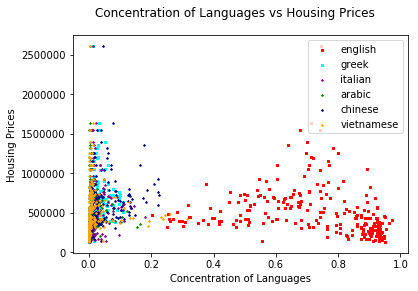

In [126]:
#just plotting the trends in housing data vs language concentrations
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
#axis 
ax1 = fig.add_subplot(111)


#scatter plot for Housing Prices vs Concentrations
ax1.scatter(dfcon['english'],dfcon['housing_price'], s=3, color='red', marker="s", label='english')
ax1.scatter(dfcon['greek'],dfcon['housing_price'], s=3, color='aqua', marker=(5,2), label='greek')
ax1.scatter(dfcon['italian'],dfcon['housing_price'], s=3, color = 'purple', marker=(5,1), label='italian')
ax1.scatter(dfcon['arabic'],dfcon['housing_price'], s=3, color = 'green', marker=(5,1), label='arabic')
ax1.scatter(dfcon['chinese'],dfcon['housing_price'], s=3, color = 'navy', marker=(5,1), label='chinese')
ax1.scatter(dfcon['vietnamese'],dfcon['housing_price'], s=3, color = 'orange', marker=(5,1), label='vietnamese')
plt.legend(loc='upper right')

#labels
plt.xlabel("Concentration of Languages")
plt.ylabel("Housing Prices")
plt.suptitle("Concentration of Languages vs Housing Prices")
#plt.show()



In [185]:
#insights into specific area
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#finding the two suburbs using a loop
for i in range(len(dfcon['region_id'])):
    if(dfcon.ix[i, 'region_id'] == 'brighton east'):
        brightE= pd.Series(dfcon.ix[i,:])
    elif(dfcon.ix[i, 'region_id'] == 'box hill north'):
        boxN = pd.Series(dfcon.ix[i,:])

#Brighton East ----------------------------------------------------------------

BEcon = list(brightE[2:-1])
languages = ['Arabic', 'Chinese', 'English', 'Greek', 'Italian', 'Vietnamese']
y_pos = np.arange(len(languages))

#plotting the bar plot
plt.bar(y_pos,BEcon)
plt.xticks(y_pos,languages, rotation=45)
plt.bar(y_pos, BEcon, align='center', alpha=0.5)

#labelling the bar plot
plt.title("Concentration of each Language in Brighton East")
plt.ylabel("Concentration (Speakers/ Population)")
plt.xlabel("Languages")
plt.show

#Boxhill North ----------------------------------------------------------------
BNcon = list(boxN[2:-1])

#plotting the bar plot
plt.bar(y_pos,BNcon)
plt.xticks(y_pos,languages, rotation=45)
plt.bar(y_pos, BNcon, align='center', alpha=0.5, color = 'navy')

#labelling the bar plot
plt.title("Concentration of each Language in Boxhill North")
plt.ylabel("Concentration (Speakers/ Population)")
plt.xlabel("Languages")
plt.show

#General stats ---------------------------------------------------------------
print("Brighton East|", "Population:",brightE['population'])
print("             |", "Median Housing Price at 2011:" , "AUD", brightE['housing_price'])
print("             |", "English Only Speakers Concentration:", brightE['english'])
print("             |", "Chinese Languages Speakers Concentration:", brightE['chinese'])

print("\n---------------------------------------------------------------------------------------------------------------\n")

print("BoxHill North|", "Population:",boxN['population'])
print("             |", "Median Housing Price at 2011:" , "AUD", boxN['housing_price'])
print("             |", "English Only Speakers Concentration:", boxN['english'])
print("             |", "Chinese Languages Speakers Concentration:", boxN['chinese'])


Brighton East| Population: 15221
             | Median Housing Price at 2011: AUD 1100000
             | English Only Speakers Concentration: 0.770185927337
             | Chinese Languages Speakers Concentration: 0.0240457262992

---------------------------------------------------------------------------------------------------------------

BoxHill North| Population: 16335
             | Median Housing Price at 2011: AUD 683000
             | English Only Speakers Concentration: 0.630976430976
             | Chinese Languages Speakers Concentration: 0.17257422712
